## 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

《ヒント》

「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [4]:
import numpy as np

def dice():
    #dice_num = list(range(1, 7))
    dice_num = [1, 2, 3, 4, 5, 6]
    return np.random.choice(dice_num)

In [5]:
dice()

4

## 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。


《ヒント》


ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。


また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

In [6]:
dice_num = dice()
x = np.random.normal(loc=dice_num, scale=0.1)
y = np.random.normal(loc=0, scale=0.1)
point = np.array([x, y])
point

array([ 3.99421228, -0.05606594])

In [7]:
scale = 0.1
var = scale**2
dice_num = dice()
mean = np.array([dice_num, 0])
cov = np.array([[var,0],[0,var]])
point2 = np.random.multivariate_normal(mean, cov)
point2

array([1.05762384, 0.04292111])

## 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。


《ヒント》


「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [8]:
def throw_darts(n):
    point_dic = {}
    for i in range(n):
        dice_num = dice()
        x = np.random.normal(loc=dice_num, scale=0.1)
        y = np.random.normal(loc=0, scale=0.1)
        point = np.array([x, y])
        if dice_num not in point_dic:
            point_dic[dice_num] = []
        point_dic[dice_num].append(point)
    return point_dic

In [10]:
throw_darts(1000)

{4: [array([ 4.0214822 , -0.12241952]),
  array([3.98056717, 0.06548143]),
  array([ 3.98715774, -0.039096  ]),
  array([3.96200376, 0.10863552]),
  array([ 3.86183903, -0.06496993]),
  array([ 3.94462708e+00, -5.69725163e-04]),
  array([4.01085135, 0.18045657]),
  array([3.8969231 , 0.20731688]),
  array([3.97732376, 0.17797041]),
  array([ 3.87160445, -0.0498942 ]),
  array([ 3.97956754, -0.02372376]),
  array([3.95632285, 0.30023035]),
  array([3.98021647, 0.28931209]),
  array([4.03474211, 0.03301892]),
  array([ 4.07148347, -0.04036951]),
  array([3.98931691, 0.04723724]),
  array([4.08426536, 0.04194296]),
  array([3.92189647, 0.06668912]),
  array([ 4.10107376, -0.13976627]),
  array([ 3.99694229, -0.01895375]),
  array([4.09438328, 0.14356923]),
  array([ 3.97139696, -0.15701307]),
  array([3.84249911, 0.0389384 ]),
  array([3.93928685, 0.04615457]),
  array([4.0629569 , 0.09122086]),
  array([ 3.98703353, -0.10727206]),
  array([4.02007862, 0.23675663]),
  array([4.01604688, 0

In [11]:
def throw_darts_v2(n):
    point_dic = {}
    for i in range(n):
        dice_num = dice()
        x = np.random.normal(loc=dice_num, scale=0.1)
        y = np.random.normal(loc=0, scale=0.1)
        point = np.array([x, y])
        point_dic.setdefault(dice_num, []).append(point)
    return point_dic

In [12]:
throw_darts_v2(1000)

{3: [array([ 3.13894543, -0.12875566]),
  array([ 2.98383521, -0.07022042]),
  array([3.00954662, 0.2772414 ]),
  array([ 2.75637987, -0.0322949 ]),
  array([3.02109708, 0.01075397]),
  array([ 2.93113819e+00, -5.01595381e-04]),
  array([ 2.92585789, -0.04540383]),
  array([ 2.97526653, -0.07361831]),
  array([ 3.05162297, -0.10993746]),
  array([3.00255791, 0.07640291]),
  array([2.90840660e+00, 1.56305697e-04]),
  array([3.13158108, 0.11797586]),
  array([3.02467083, 0.09079923]),
  array([ 3.01984209, -0.05845993]),
  array([2.93360824, 0.04472063]),
  array([ 2.77034501, -0.10574583]),
  array([ 3.22931578, -0.04108069]),
  array([2.98110401, 0.16323774]),
  array([2.93175923, 0.10822311]),
  array([ 3.07810656, -0.01397055]),
  array([ 2.93972561, -0.14013451]),
  array([2.92383069, 0.10713601]),
  array([3.09479155, 0.01383939]),
  array([3.05420528, 0.09616037]),
  array([3.13673388, 0.04570465]),
  array([2.79469077, 0.01225431]),
  array([ 2.93802811, -0.01818113]),
  array([ 

## 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください

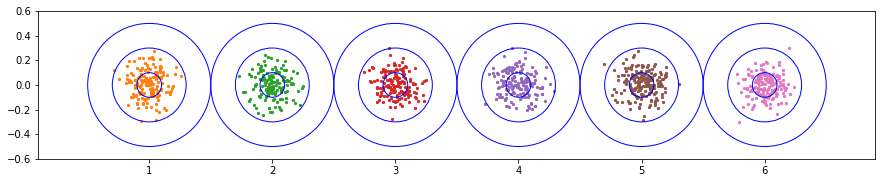

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

point_dic = throw_darts(1000)

for i in range(1,7):
    c1 = mpatches.Circle(xy=(i, 0), radius=0.5, fill=False, ec='b')
    c2 = mpatches.Circle(xy=(i, 0), radius=0.3, fill=False, ec='b')
    c3 = mpatches.Circle(xy=(i, 0), radius=0.1, fill=False, ec='b')

    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(c3)
    
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for point in point_dic[i]:
        x = point[:][0]
        y = point[:][1]
        plt.scatter(x, y, color=cycle[i], s=5)
 

ax.set_xlim(0.1, 6.9)
ax.set_ylim(-0.6, 0.6)
ax.set_aspect(1.0)
plt.show()

## 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

In [168]:
def throw_darts(n, targets):
    point_dic = {}
    for i in range(n):
        dice_num = np.random.randint(1, targets+1)
        x = np.random.normal(loc=dice_num, scale=0.1)
        y = np.random.normal(loc=0, scale=0.1)
        point = np.array([x, y])
        if dice_num not in point_dic:
            point_dic[dice_num] = []
        point_dic[dice_num].append(point)
    return point_dic

In [179]:
def draw_target(n, targets):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot()

    point_dic = throw_darts(n, targets)

    for i in range(1,targets+1):
        c1 = mpatches.Circle(xy=(i, 0), radius=0.5, fill=False, ec='b')
        c2 = mpatches.Circle(xy=(i, 0), radius=0.3, fill=False, ec='b')
        c3 = mpatches.Circle(xy=(i, 0), radius=0.1, fill=False, ec='b')

        ax.add_patch(c1)
        ax.add_patch(c2)
        ax.add_patch(c3)

        cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

        for point in point_dic[i]:
            x = point[:][0]
            y = point[:][1]
            plt.scatter(x, y, color=cycle[i%10], s=5) #プロット色は10色


    ax.set_xlim(0.1, targets+0.9)
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect(1.0)
    plt.show()

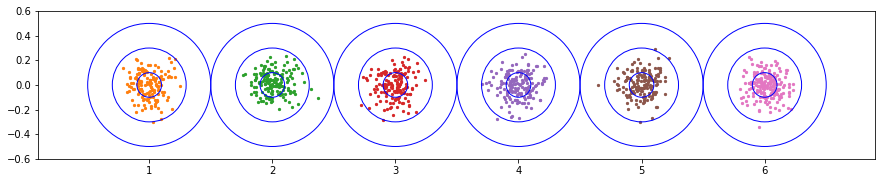

In [182]:
draw_target(1000, 6)

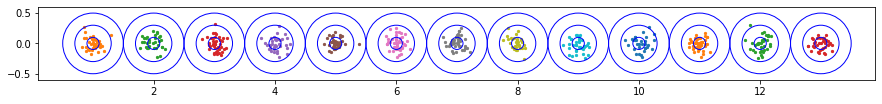

In [183]:
draw_target(500, 13)